# Instalação e importação das dependências

In [1]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise exploratória dos dados

## (Arquivos 1 a 4)

In [2]:
df_producao = pd.read_csv('1- producao-de-plastico-global.csv')
df_residuo = pd.read_csv('2- participacao-despejo-residuo-plastico.csv')
df_destino = pd.read_csv('3- destino-plastico.csv')
df_desperdicio = pd.read_csv('4- desperdicio-plastico-per-capita.csv')
df_poluicao = pd.read_csv('5- poluicao-agua-cidades.csv')

df_residuo.sample()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
60,Guinea,GIN,2019,0.239622


## CSV 1 (Produção de plástico global)

In [10]:
#vou verificar a estrutura do csv
df_producao.head()

,Entidade,Ano,Produção Anual de Plástico
0,Mundo,1950,2000000
1,Mundo,1951,2000000
2,Mundo,1952,2000000
3,Mundo,1953,3000000
4,Mundo,1954,3000000


In [4]:
#vou dropar as duplicatas
df_producao = df_producao.drop_duplicates()

## CSV 2 (participacao dos residuos de plastico para oceano)

In [63]:
df_residuo.head()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,africa,NaN,2019,7.989317
1,albania,ALB,2019,0.159782
2,algeria,DZA,2019,0.589510
3,angola,AGO,2019,0.087804
4,antigua and barbuda,ATG,2019,0.000204


In [64]:
df_residuo["Entidade"] = df_residuo["Entidade"].str.lower()
df_residuo

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,africa,NaN,2019,7.989317
1,albania,ALB,2019,0.159782
2,algeria,DZA,2019,0.589510
3,angola,AGO,2019,0.087804
4,antigua and barbuda,ATG,2019,0.000204
...,...,...,...,...
165,venezuela,VEN,2019,0.611359
166,vietnam,VNM,2019,2.881287
167,western sahara,ESH,2019,0.003880
168,yemen,YEM,2019,0.025729


In [65]:
df_residuos_filtrado = df_residuo.dropna(subset=['Código'])

In [66]:
df_residuos_filtrado = df_residuos_filtrado.drop_duplicates()

In [67]:
#filtrei o código para tudo o que for valor 0 sair
df_residuos_filtrado = df_residuos_filtrado[df_residuos_filtrado['Participação na emissão global de plásticos para o oceano'] != 0]

In [80]:
df_residuos_filtrado = df_residuos_filtrado.sort_values(by='Participação na emissão global de plásticos para o oceano', ascending=False)
df_residuos_filtrado

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
119,philippines,PHL,2019,36.384511
67,india,IND,2019,12.916633
89,malaysia,MYS,2019,7.463107
25,china,CHN,2019,7.218993
68,indonesia,IDN,2019,5.751446
...,...,...,...,...
103,namibia,NAM,2019,0.000204
4,antigua and barbuda,ATG,2019,0.000204
127,saint kitts and nevis,KNA,2019,0.000102
112,oman,OMN,2019,0.000102


In [76]:
##EXEMPLOOOOOOOOOOOOOOO
#soma = df['nome_da_coluna'].sum()

#concatenei o top 10 com o "resto"

top10_residuos = df_residuos_filtrado.head(10)

soma_other = df_residuos_filtrado['Participação na emissão global de plásticos para o oceano'].sum() - top10_residuos['Participação na emissão global de plásticos para o oceano'].sum() 

other_residuos = pd.DataFrame({
    'Entidade' : ['other'],
    'Código' : ['OTH'],
    'Participação na emissão global de plásticos para o oceano' : [soma_other]
})

other_residuos

,Entidade,Código,Participação na emissão global de plásticos para o oceano
0,other,OTH,16.739054


In [78]:
df_residuos_concatenado = pd.concat([top10_residuos, other_residuos], axis=0)

df_residuos_concatenado

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
119,philippines,PHL,2019.0,36.384511
67,india,IND,2019.0,12.916633
89,malaysia,MYS,2019.0,7.463107
25,china,CHN,2019.0,7.218993
68,indonesia,IDN,2019.0,5.751446
16,brazil,BRA,2019.0,3.859175
166,vietnam,VNM,2019.0,2.881287
10,bangladesh,BGD,2019.0,2.515677
154,thailand,THA,2019.0,2.328431
107,nigeria,NGA,2019.0,1.903093


## CSV 3 (Destino plástico) 

In [12]:
df_destino.head()

,Entidade,Código,Ano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,Americas (excl. USA),NaN,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),NaN,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),NaN,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),NaN,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),NaN,2004,5.740007,1.175283,32.480970,60.603745


In [16]:
df_destino = df_destino.drop_duplicates()
df_destino.dropna(how='all', inplace=True)

df_destino

,Entidade,Código,Ano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,americas (excl. usa),NaN,2000,4.721963,1.220057,32.702644,61.355328
1,americas (excl. usa),NaN,2001,4.972505,1.208672,32.651270,61.167557
2,americas (excl. usa),NaN,2002,5.227469,1.197566,32.610554,60.964405
3,americas (excl. usa),NaN,2003,5.482511,1.186352,32.546440,60.784700
4,americas (excl. usa),NaN,2004,5.740007,1.175283,32.480970,60.603745
...,...,...,...,...,...,...,...
195,world,OWID_WRL,2015,8.164696,17.625141,24.083096,50.127070
196,world,OWID_WRL,2016,8.450203,18.084925,23.626896,49.837975
197,world,OWID_WRL,2017,8.747166,18.578430,23.199600,49.474804
198,world,OWID_WRL,2018,9.036769,19.083899,22.697952,49.181380


In [89]:
df_destino_china = df_destino.groupby('China')
df_destino_china = df_destino_china.get_group('China')

KeyError: 'China'

# Gerar os graficos

## Grafico da Producao Anual de plastico ao longo dos anos (CSV 1)

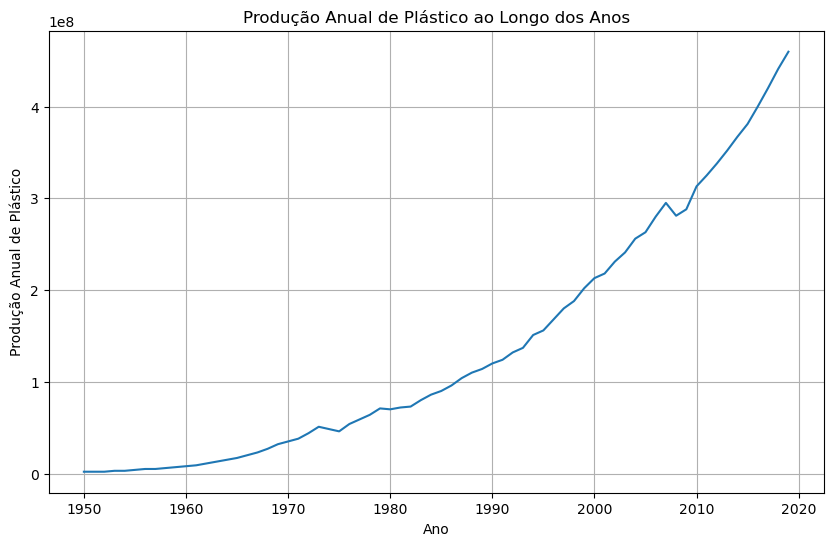

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df_producao['Ano'], df_producao['Produção Anual de Plástico'])
plt.title('Produção Anual de Plástico ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Produção Anual de Plástico')
plt.grid(True)
plt.show()

## grafico do resíduo (CSV 2)

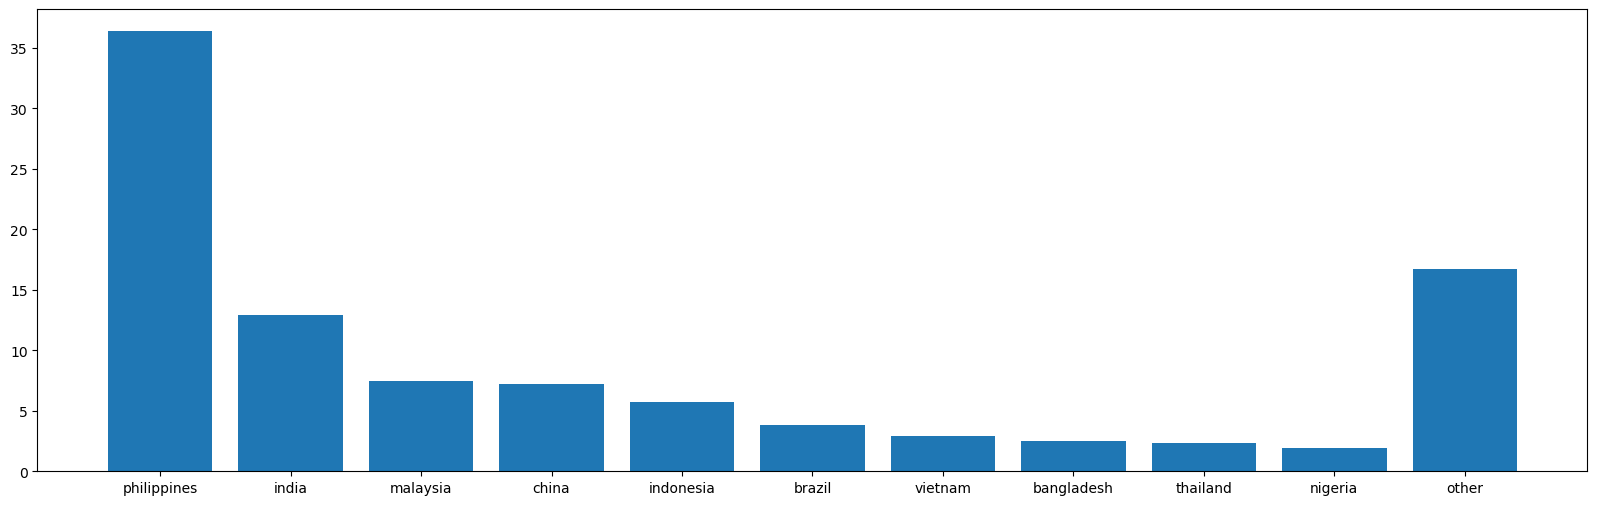

In [79]:
plt.figure(figsize=(20, 6))
plt.bar(df_residuos_concatenado['Entidade'], df_residuos_concatenado['Participação na emissão global de plásticos para o oceano'])
plt.show()

## Grafico do destino (CSV 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entidade                                                          200 non-null    object 
 1    Código                                                           80 non-null     object 
 2    Ano                                                              200 non-null    int64  
 3    Participação da reciclagem do lixo total regional                200 non-null    float64
 4    Participação da queima do lixo total regional                    200 non-null    float64
 5    Participação do lixo descartado e mal gerido do total regional   200 non-null    float64
 6    Participação do lixo encaminhado para aterros do total regional  200 non-null    float64
dtypes: float64(4), int64(1), object(2)
m